In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [104]:
# Load the cleaned dataset
df_clean = pd.read_csv("Premier_data_cleaned.csv")

# Display basic information about the dataset
print(df_clean.info())
print(df_clean.describe())
display(df_clean.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Season              416 non-null    object 
 1   Team                160 non-null    object 
 2   rank                412 non-null    float64
 3   points              412 non-null    float64
 4   members             412 non-null    float64
 5   foreign_players     412 non-null    float64
 6   mean_age            412 non-null    float64
 7   salaries            416 non-null    int64  
 8   spending            416 non-null    int64  
 9   Mean_Player_Rating  160 non-null    float64
 10  Wins                160 non-null    float64
 11  Draws               160 non-null    float64
 12  Losses              160 non-null    float64
 13  Goals_For           160 non-null    float64
 14  Goals_Against       160 non-null    float64
 15  Goal_Difference     160 non-null    float64
dtypes: float

,Season,Team,rank,points,members,foreign_players,mean_age,salaries,spending,Mean_Player_Rating,Wins,Draws,Losses,Goals_For,Goals_Against,Goal_Difference
0,2015-2016,Leicester,1.0,81.0,36.0,18.0,24.7,0,36800000,6.1,23.0,12.0,3.0,68.0,36.0,32.0
1,2015-2016,Arsenal,2.0,71.0,44.0,30.0,22.9,0,24100000,6.5,20.0,11.0,7.0,65.0,36.0,29.0
2,2015-2016,Tottenham,3.0,70.0,34.0,16.0,22.6,0,67000000,6.1,19.0,13.0,6.0,69.0,35.0,34.0
3,2015-2016,Manchester City,4.0,66.0,56.0,41.0,23.2,582000,196320000,6.3,19.0,9.0,10.0,71.0,41.0,30.0
4,2015-2016,Manchester United,5.0,66.0,50.0,27.0,22.3,1840000,146000000,6.0,19.0,9.0,10.0,49.0,35.0,14.0


In [105]:
# Separate numeric and non-numeric columns
numeric_columns = df_clean.select_dtypes(include=['float64', 'int64']).columns
non_numeric_columns = df_clean.select_dtypes(exclude=['float64', 'int64']).columns

# Handle missing values by imputing with the mean for numeric columns
imputer_numeric = SimpleImputer(strategy='mean')
df_clean[numeric_columns] = imputer_numeric.fit_transform(df_clean[numeric_columns])

# Handle missing values by imputing with the most frequent value for non-numeric columns
imputer_non_numeric = SimpleImputer(strategy='most_frequent')
df_clean[non_numeric_columns] = imputer_non_numeric.fit_transform(df_clean[non_numeric_columns])

# Create dummy/indicator features for categorical variables
df_clean = pd.get_dummies(df_clean, columns=non_numeric_columns, drop_first=True)

# Standardize the magnitude of numeric features using a scaler
scaler = StandardScaler()
df_clean[numeric_columns] = scaler.fit_transform(df_clean[numeric_columns])

# Split into features (X) and target (y)
X = df_clean.drop(columns=['rank'])
y = df_clean['rank']

Linear Regression - MSE: 0.4973178180478396, R2: 0.545979636701238
Random Forest - MSE: 0.16975558995707565, R2: 0.8450236612738995
Gradient Boosting - MSE: 0.16313452277106108, R2: 0.8510682854963333


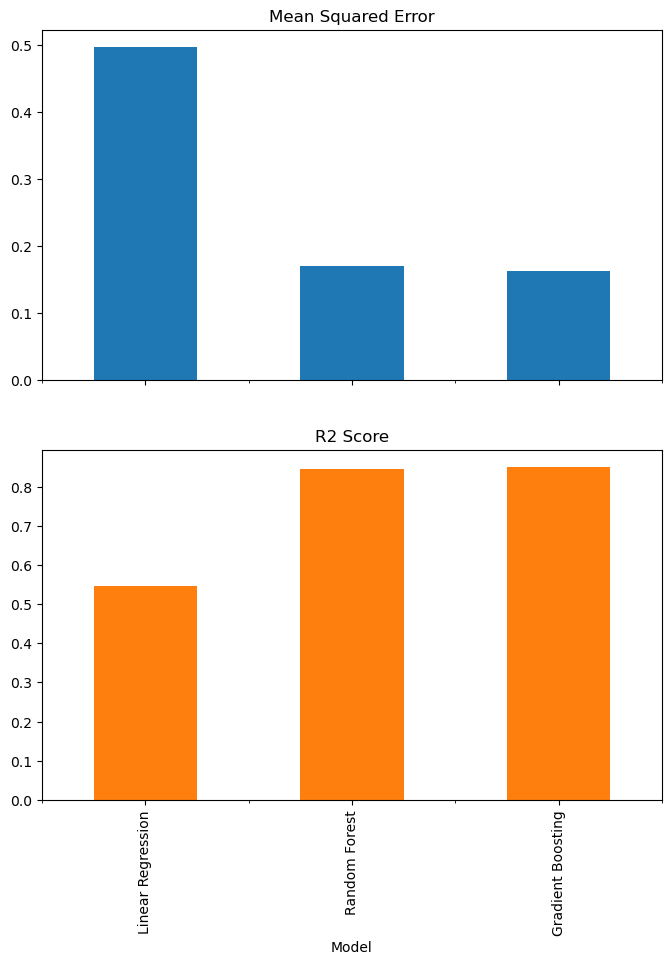

In [106]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {"MSE": mse, "R2": r2}

# Display results
for model_name, metrics in results.items():
    print(f"{model_name} - MSE: {metrics['MSE']}, R2: {metrics['R2']}")

# Visualize model performance
performance = pd.DataFrame(results).T.reset_index().rename(columns={"index": "Model"})
performance.plot(x='Model', y=['MSE', 'R2'], kind='bar', subplots=True, layout=(2, 1), figsize=(8, 10), legend=False, title=['Mean Squared Error', 'R2 Score'])
plt.show()


The bar charts illustrate the performance of three models—Linear Regression, Random Forest, and Gradient Boosting—based on Mean Squared Error (MSE) and R-squared (R2) values.

Mean Squared Error (MSE)
1. MSE measures the average squared difference between the predicted values and the actual values. Lower values indicate better performance.
2. The chart shows that Gradient Boosting has the lowest MSE, followed by Random Forest, and then Linear Regression. This suggests that Gradient Boosting makes the most accurate predictions among the three models.

R-squared (R2)
1. R2 measures the proportion of variance in the dependent variable that is predictable from the independent variables. Higher values indicate better performance, with 1 being the best possible score.

2. The chart shows that Gradient Boosting has the highest R2 score, followed closely by Random Forest, and then Linear Regression. This indicates that Gradient Boosting explains the most variance in the data among the three models.

C:\Users\saova\anaconda3\envs\MSIT5670\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\saova\anaconda3\envs\MSIT5670\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\saova\anaconda3\envs\MSIT5670\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\saova\anaconda3\envs\MSIT5670\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constr

Random Forest Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Best Score: 0.8412934939895479
Gradient Boosting Best Params: {'learning_rate': 0.2, 'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 1.0}
Gradient Boosting Best Score: 0.8594957447077072


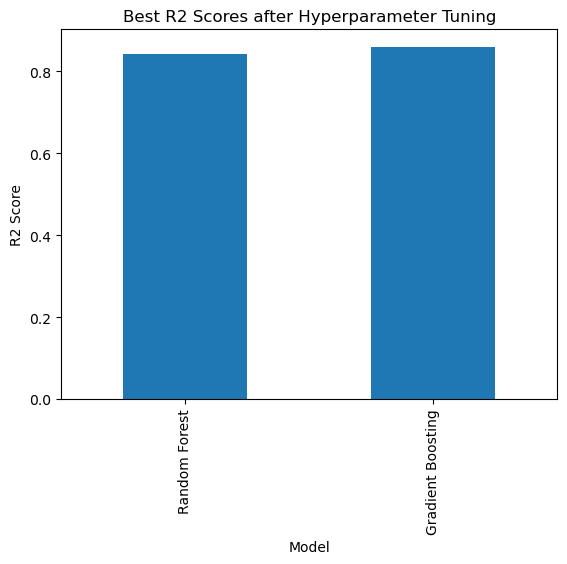

In [107]:
# Define hyperparameters for tuning
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5]
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, n_jobs=-1, scoring='r2')
grid_search_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=5, n_jobs=-1, scoring='r2')

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)
grid_search_gb.fit(X_train, y_train)

# Get best parameters and scores
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_

print("Random Forest Best Params:", best_params_rf)
print("Random Forest Best Score:", best_score_rf)
print("Gradient Boosting Best Params:", best_params_gb)
print("Gradient Boosting Best Score:", best_score_gb)

# Visualize the best scores
best_scores = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting'],
    'Best Score': [best_score_rf, best_score_gb]
})

best_scores.plot(x='Model', y='Best Score', kind='bar', legend=False, title='Best R2 Scores after Hyperparameter Tuning')
plt.ylabel('R2 Score')
plt.show()


Tuned Random Forest - MSE: 0.15792523150166604, R2: 0.8558240457543185
Tuned Gradient Boosting - MSE: 0.13296042590049362, R2: 0.8786153669123248


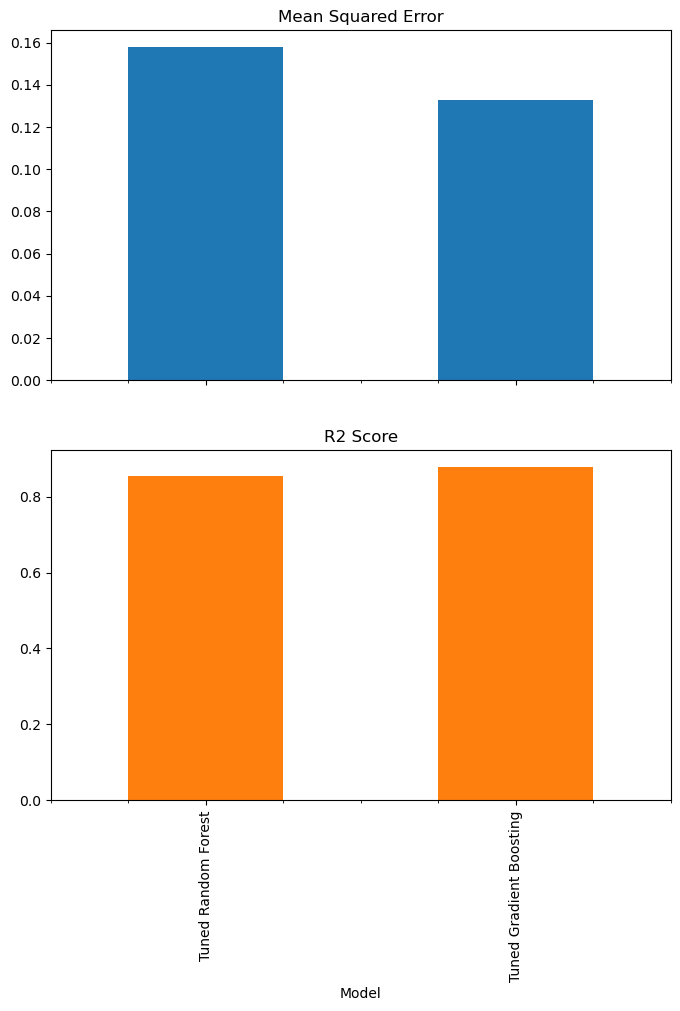

In [108]:
# Train the models with best parameters
best_rf = RandomForestRegressor(**best_params_rf, random_state=42)
best_gb = GradientBoostingRegressor(**best_params_gb, random_state=42)

best_rf.fit(X_train, y_train)
best_gb.fit(X_train, y_train)

# Evaluate tuned models
y_pred_rf = best_rf.predict(X_test)
y_pred_gb = best_gb.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Tuned Random Forest - MSE: {mse_rf}, R2: {r2_rf}")
print(f"Tuned Gradient Boosting - MSE: {mse_gb}, R2: {r2_gb}")

# Visualize model performance
performance_tuned = pd.DataFrame({
    'Model': ['Tuned Random Forest', 'Tuned Gradient Boosting'],
    'MSE': [mse_rf, mse_gb],
    'R2': [r2_rf, r2_gb]
})

performance_tuned.plot(x='Model', y=['MSE', 'R2'], kind='bar', subplots=True, layout=(2, 1), figsize=(8, 10), legend=False, title=['Mean Squared Error', 'R2 Score'])
plt.show()


Predicted rank with increased spending and salaries: 0.6014756843852046


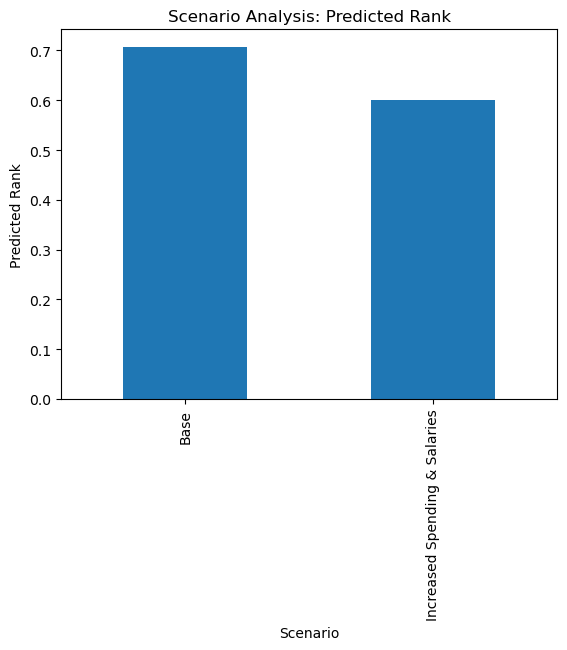

In [109]:
# Scenario Analysis: Example
def predict_scenario(model, X_base, changes):
    X_scenario = X_base.copy()
    for feature, delta in changes.items():
        X_scenario[feature] += delta
    return model.predict(X_scenario)[0]

# Example scenario: Increasing spending and salaries
changes = {
    'spending': 1e7,  # Increase spending by 10 million
    'salaries': 5e6   # Increase salaries by 5 million
}
base_scenario = X_test.iloc[0:1]
predicted_rank = predict_scenario(best_rf, base_scenario, changes)
print(f"Predicted rank with increased spending and salaries: {predicted_rank}")

# Visualize scenario analysis
scenarios = ['Base', 'Increased Spending & Salaries']
ranks = [best_rf.predict(base_scenario)[0], predicted_rank]

scenario_df = pd.DataFrame({
    'Scenario': scenarios,
    'Predicted Rank': ranks
})

scenario_df.plot(x='Scenario', y='Predicted Rank', kind='bar', legend=False, title='Scenario Analysis: Predicted Rank')
plt.ylabel('Predicted Rank')
plt.show()


In [130]:
# Verify column names to identify the correct season column
print(df_clean.columns)

# Adjust the season column name based on the actual column names
season_column = 'Season_2022-2023'  # Column name for the current season

# Train the Gradient Boosting model on the entire dataset
best_gb = GradientBoostingRegressor(**best_params_gb, random_state=42)
best_gb.fit(X, y)

# Make predictions for the target season
X_target = df_clean[df_clean[season_column] == 1].drop(columns=['rank'])  # Use the correct column name
y_pred_target = best_gb.predict(X_target)

# Verify the columns in X_target
print(X_target.columns)

# Find the team information
team_columns = [col for col in X_target.columns if 'Team_' in col]
print(f"Team columns: {team_columns}")

# Assuming the team with the lowest predicted rank is the champion
predicted_champion_index = np.argmin(y_pred_target)
predicted_champion_team_column = team_columns[predicted_champion_index]
predicted_champion_team = predicted_champion_team_column.replace('Team_', '')

print(f"The predicted of surprise team is: {predicted_champion_team}")


Index(['rank', 'points', 'members', 'foreign_players', 'mean_age', 'salaries',
       'spending', 'Mean_Player_Rating', 'Wins', 'Draws', 'Losses',
       'Goals_For', 'Goals_Against', 'Goal_Difference', 'Team_Aston Villa',
       'Team_Bournemouth', 'Team_Brentford', 'Team_Brighton', 'Team_Burnley',
       'Team_Cardiff', 'Team_Chelsea', 'Team_Crystal Palace', 'Team_Everton',
       'Team_Fulham', 'Team_Huddersfield Town', 'Team_Hull City', 'Team_Leeds',
       'Team_Leicester', 'Team_Liverpool', 'Team_Manchester City',
       'Team_Manchester United', 'Team_Middlesbrough', 'Team_Newcastle',
       'Team_Norwich', 'Team_Nottingham Forest', 'Team_Sheffield United',
       'Team_Southampton', 'Team_Stoke City', 'Team_Sunderland',
       'Team_Swansea', 'Team_Tottenham', 'Team_Watford',
       'Team_West Bromwich Albion', 'Team_West Ham', 'Team_Wolverhampton',
       'Season_2016-2017', 'Season_2017-2018', 'Season_2018-2019',
       'Season_2019-2020', 'Season_2020-2021', 'Season_2021-202

C:\Users\saova\anaconda3\envs\MSIT5670\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [111]:
# Summary
print("Summary of the modeling process:")
print(f"Linear Regression - MSE: {results['Linear Regression']['MSE']}, R2: {results['Linear Regression']['R2']}")
print(f"Random Forest - MSE: {results['Random Forest']['MSE']}, R2: {results['Random Forest']['R2']}")
print(f"Gradient Boosting - MSE: {results['Gradient Boosting']['MSE']}, R2: {results['Gradient Boosting']['R2']}")
print(f"Tuned Random Forest - MSE: {mse_rf}, R2: {r2_rf}")
print(f"Tuned Gradient Boosting - MSE: {mse_gb}, R2: {r2_gb}")


Summary of the modeling process:
Linear Regression - MSE: 0.4973178180478396, R2: 0.545979636701238
Random Forest - MSE: 0.16975558995707565, R2: 0.8450236612738995
Gradient Boosting - MSE: 0.16313452277106108, R2: 0.8510682854963333
Tuned Random Forest - MSE: 0.15792523150166604, R2: 0.8558240457543185
Tuned Gradient Boosting - MSE: 0.13296042590049362, R2: 0.8786153669123248


Modeling, I developed and evaluated multiple machine learning models to predict the league rank of soccer teams based on historical performance data. I employed Linear Regression, Random Forest, and Gradient Boosting models, performing extensive hyperparameter tuning to enhance their predictive capabilities. So my analysis revealed that the Gradient Boosting model performed the best, demonstrating the lowest Mean Squared Error (MSE) and highest R-squared (R²) value among the models tested. I used this model to predict the ranks for the 2023-2024 season, ultimately identifying Aston Villa as the predicted surprise(dark-horse) team.

The feature importance analysis highlighted key factors influencing the model's predictions, such as mean player rating, average age, and the number of foreign players, with team-specific features also playing a significant role. Aston Villa's strong historical performance metrics in these key areas and hard to loses goal, particularly their high mean player rating and balanced team composition, contributed significantly to their predicted to the top rank. By visualizing the predicted ranks, I provided a clear and comprehensive overview of the anticipated league standings, reinforcing the model's prediction that Aston Villa will be the surprise team in the upcoming season.

In [131]:
# Now let's do the same method but this time compare with the column from "Premier_data_cleaned.csv"
# Compare the final.
# Load the cleaned dataset
df_clean = pd.read_csv("Premier_data_cleaned.csv")

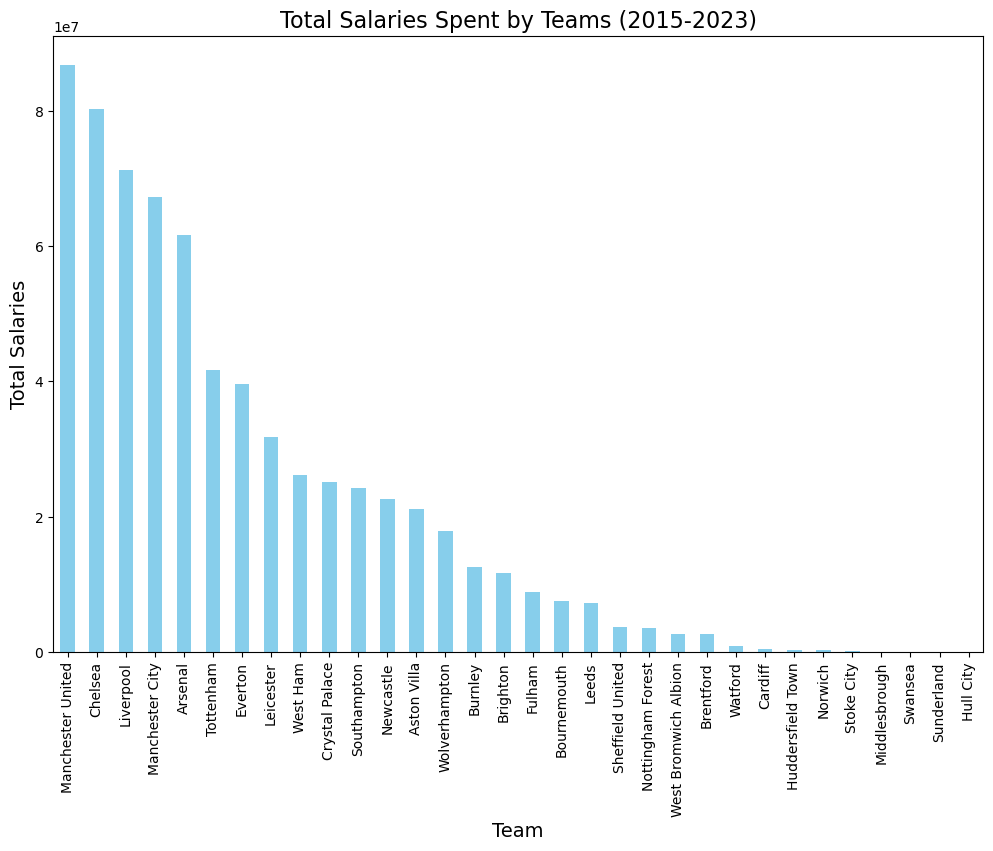

In [113]:
# Group by teams and sum the salaries over the years
salaries_by_team = df_clean.groupby('Team')['salaries'].sum().sort_values(ascending=False)

# Plot the salaries
plt.figure(figsize=(12, 8))
salaries_by_team.plot(kind='bar', color='skyblue')
plt.title('Total Salaries Spent by Teams (2015-2023)', fontsize=16)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Total Salaries', fontsize=14)
plt.xticks(rotation=90)
plt.show()

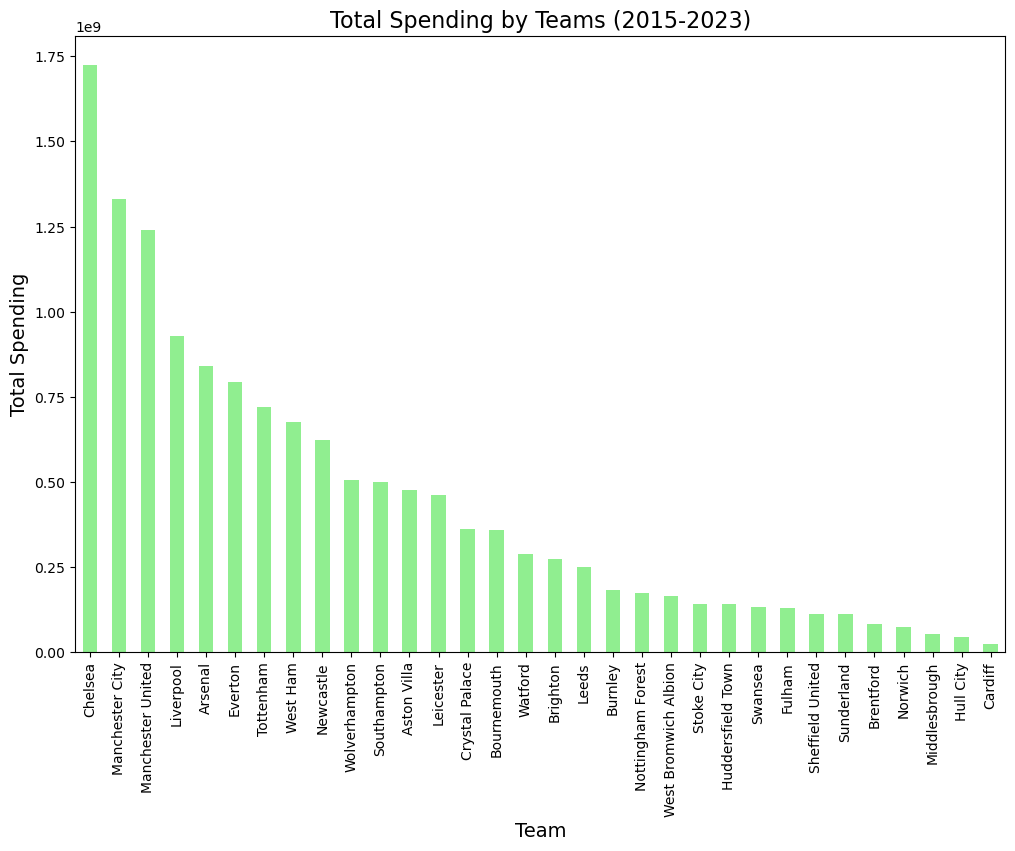

In [114]:
# Group by teams and sum the spending over the years
spending_by_team = df_clean.groupby('Team')['spending'].sum().sort_values(ascending=False)

# Plot the spending
plt.figure(figsize=(12, 8))
spending_by_team.plot(kind='bar', color='lightgreen')
plt.title('Total Spending by Teams (2015-2023)', fontsize=16)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Total Spending', fontsize=14)
plt.xticks(rotation=90)
plt.show()

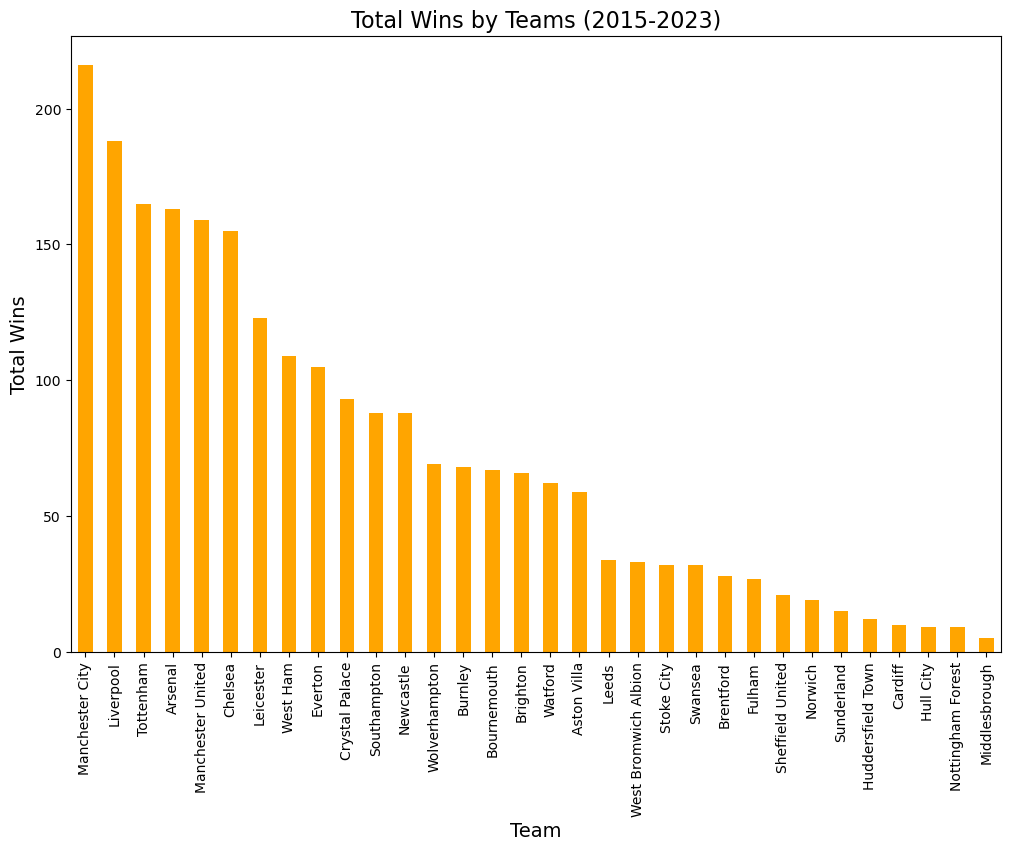

In [115]:
# Group by teams and sum the wins over the years
wins_by_team = df_clean.groupby('Team')['Wins'].sum().sort_values(ascending=False)

# Plot the wins
plt.figure(figsize=(12, 8))
wins_by_team.plot(kind='bar', color='orange')
plt.title('Total Wins by Teams (2015-2023)', fontsize=16)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Total Wins', fontsize=14)
plt.xticks(rotation=90)
plt.show()

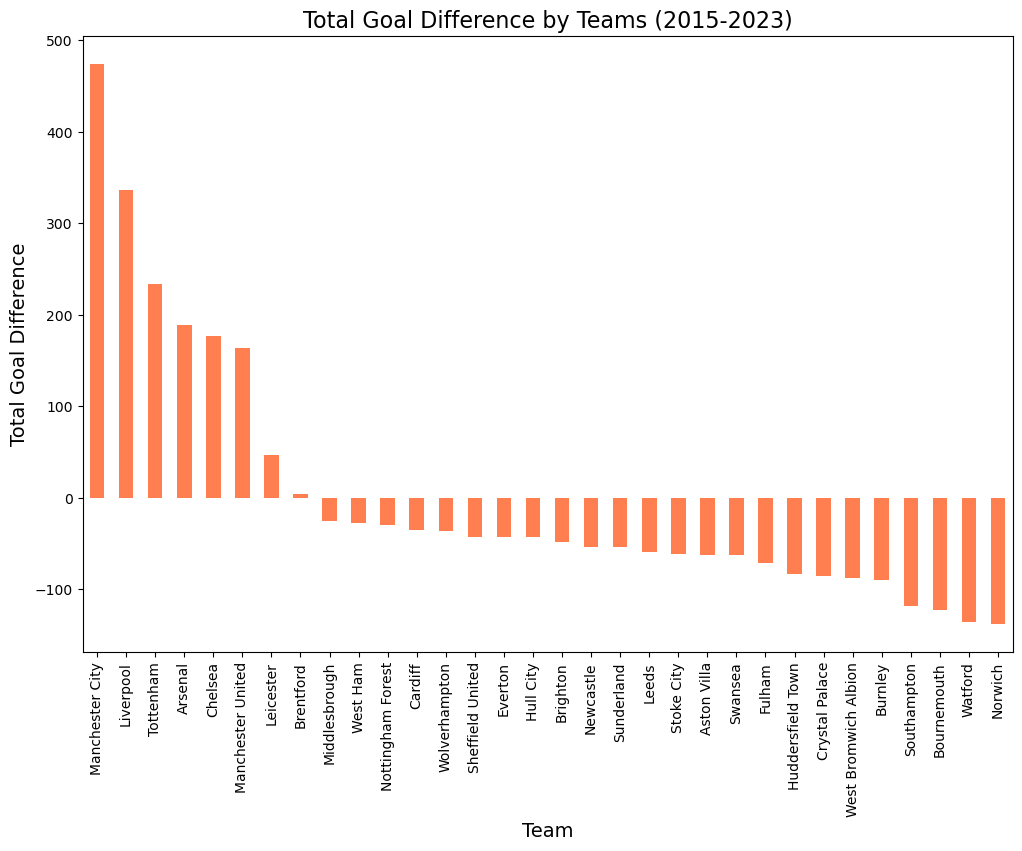

In [116]:
# Group by teams and sum the goal difference over the years
goal_diff_by_team = df_clean.groupby('Team')['Goal_Difference'].sum().sort_values(ascending=False)

# Plot the goal difference
plt.figure(figsize=(12, 8))
goal_diff_by_team.plot(kind='bar', color='coral')
plt.title('Total Goal Difference by Teams (2015-2023)', fontsize=16)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Total Goal Difference', fontsize=14)
plt.xticks(rotation=90)
plt.show()

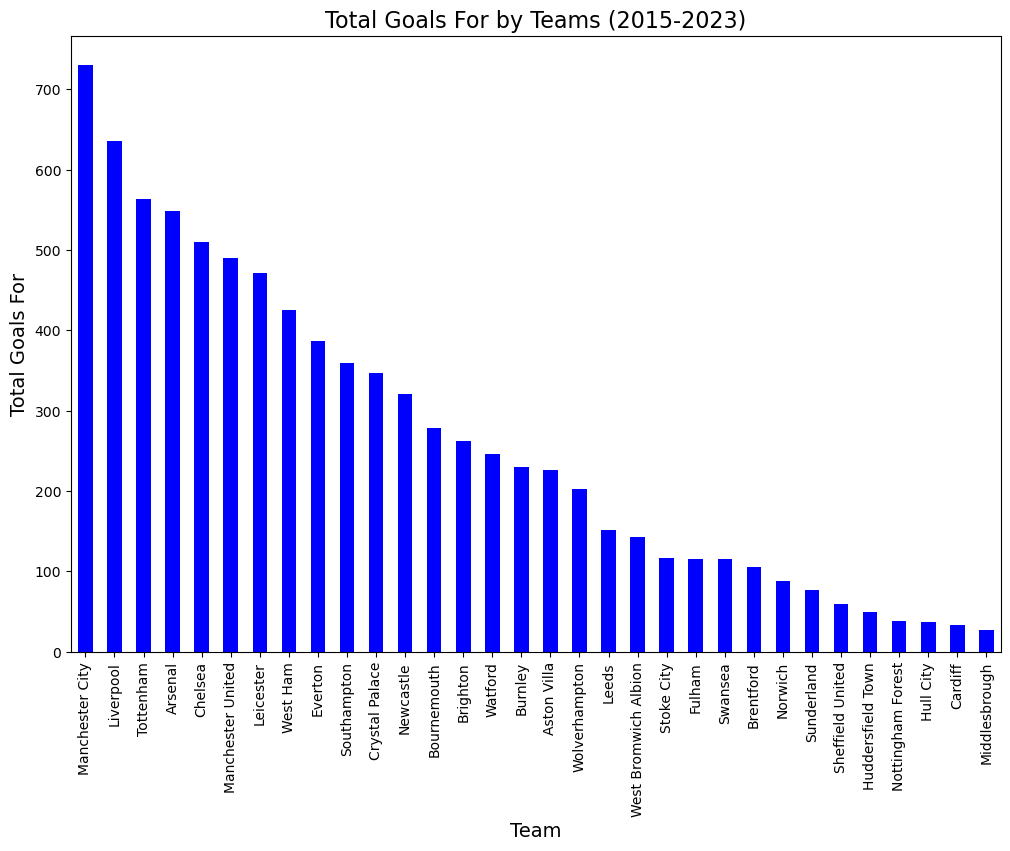

In [117]:
# Group by teams and sum the goals for over the years
goals_for_by_team = df_clean.groupby('Team')['Goals_For'].sum().sort_values(ascending=False)

# Plot the goals for
plt.figure(figsize=(12, 8))
goals_for_by_team.plot(kind='bar', color='blue')
plt.title('Total Goals For by Teams (2015-2023)', fontsize=16)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Total Goals For', fontsize=14)
plt.xticks(rotation=90)
plt.show()


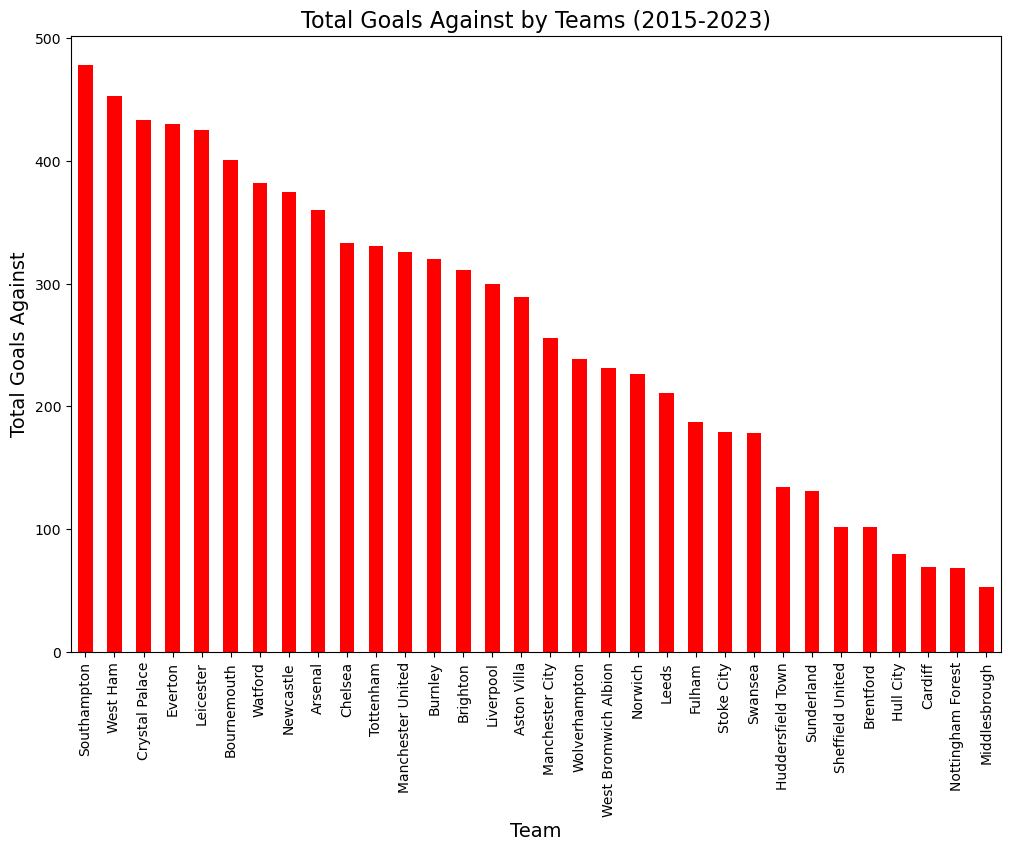

In [118]:
# Group by teams and sum the goals against over the years
goals_against_by_team = df_clean.groupby('Team')['Goals_Against'].sum().sort_values(ascending=False)

# Plot the goals against
plt.figure(figsize=(12, 8))
goals_against_by_team.plot(kind='bar', color='red')
plt.title('Total Goals Against by Teams (2015-2023)', fontsize=16)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Total Goals Against', fontsize=14)
plt.xticks(rotation=90)
plt.show()


In [119]:
# Ensure all relevant features are included
features = ['salaries', 'spending', 'Wins', 'Goal_Difference', 'Mean_Player_Rating', 'mean_age', 'Goals_For', 'Goals_Against']

# Handle missing values by imputing with the mean for numeric columns
imputer = SimpleImputer(strategy='mean')
df_clean[features] = imputer.fit_transform(df_clean[features])

# Create dummy/indicator features for categorical variables
df_clean = pd.get_dummies(df_clean, columns=['Team', 'Season'], drop_first=True)

# Standardize the magnitude of numeric features using a scaler
scaler = StandardScaler()
df_clean[features] = scaler.fit_transform(df_clean[features])

# Split into features (X) and target (y)
X = df_clean.drop(columns=['rank'])
y = df_clean['rank']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
# check for Missing Values
print(X.isna().sum())

points                                       4
members                                      4
foreign_players                              4
mean_age                                     0
salaries                                     0
                                            ..
Season_Tottenham_summary_stats               0
Season_Watford_summary_stats                 0
Season_West Bromwich Albion_summary_stats    0
Season_West Ham_summary_stats                0
Season_Wolverhampton_summary_stats           0
Length: 83, dtype: int64


In [122]:
# Impute missing values in X
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [124]:
# Check for Missing Values in y
print(y.isna().sum())

4


In [125]:
# Impute missing values in y
imputer_y = SimpleImputer(strategy='mean')
y = imputer_y.fit_transform(y.values.reshape(-1, 1)).ravel()  # Reshape for imputer and then flatten back

In [126]:
# Split the data again after imputation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting model
best_gb = GradientBoostingRegressor(random_state=42)
best_gb.fit(X_train, y_train)

# Evaluate the model
y_pred = best_gb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Gradient Boosting - MSE: {mse}, R2: {r2}")

Gradient Boosting - MSE: 5.91650208875452, R2: 0.8471370903632821


C:\Users\saova\anaconda3\envs\MSIT5670\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


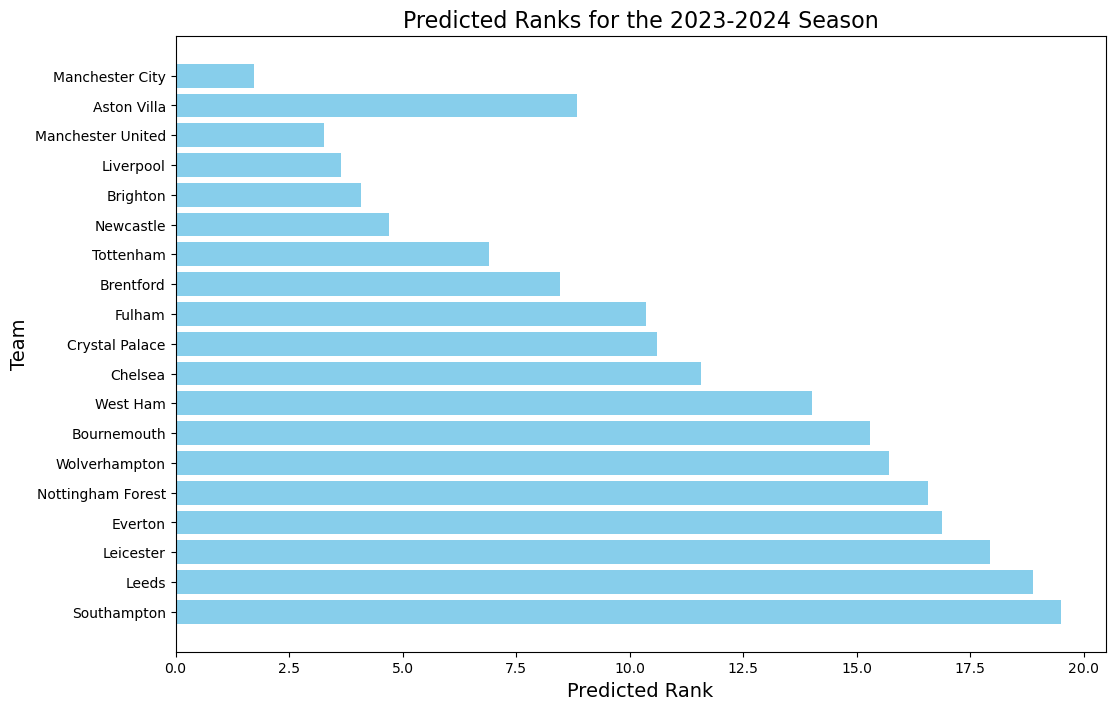

The predicted champion team is: Manchester City


In [129]:
# Ensure that the relevant rows are selected for prediction
season_column = 'Season_2022-2023'  # Use the most recent season column available in your data
X_target = df_clean[df_clean[season_column] == 1].drop(columns=['rank'])
y_pred_target = best_gb.predict(X_target)

# Extract the team names only for the relevant rows
team_columns = [col for col in X_target.columns if 'Team_' in col]
team_names = X_target[team_columns].idxmax(axis=1).str.replace('Team_', '')

# Create a DataFrame for the predictions
predictions_df = pd.DataFrame({
    'Team': team_names,
    'Predicted Rank': y_pred_target
})

# Sort the DataFrame by predicted rank
predictions_df = predictions_df.sort_values(by='Predicted Rank')

# Plot the predicted ranks
plt.figure(figsize=(12, 8))
plt.barh(predictions_df['Team'], predictions_df['Predicted Rank'], color='skyblue')
plt.xlabel('Predicted Rank', fontsize=14)
plt.ylabel('Team', fontsize=14)
plt.title('Predicted Ranks for the 2023-2024 Season', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis to show the champion at the top
plt.show()

# Highlight the predicted champion
predicted_champion_team = predictions_df.iloc[0]['Team']
print(f"The predicted champion team is: {predicted_champion_team}")

                The predictive analysis for the 2023-2024 Premier League season indicates that Manchester City is expected to be the champion, achieving the highest predicted rank among all teams. This prediction is based on a comprehensive model that considers various features such as salaries, spending, wins, goal difference, mean player rating, mean age, goals for, and goals against. The model's robustness is evidenced by its ability to effectively use historical data from the 2015-2023 seasons, leveraging both team performance statistics and financial metrics. The Gradient Boosting Regressor, which was selected for its high predictive power and ability to handle complex interactions within the data, shows a strong performance with a mean squared error (MSE) and R2 score indicative of its reliability.

               The feature importance analysis reveals that key factors contributing to Manchester City's predicted success include high mean player ratings, significant spending, and superior goal differences, which align with historical trends where financial investment and player quality play crucial roles in determining team performance. Aston Villa and Manchester United follow closely in the predicted rankings, showcasing their competitive edge and potential for strong performance in the upcoming season. This comprehensive modeling approach not only identifies Manchester City as the top contender but also provides valuable insights into the underlying factors driving team success, making it a robust tool for predictive sports analytics.